# Projeto 19: Geração de novas imagens com GANs

## Etapa 1: Importação das bibliotecas

In [1]:
import torch
from torch import nn, optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch.nn.functional as F

torch.manual_seed(42)


## Etapa 2: Base de dados

In [2]:
transform = transforms.ToTensor()

train = datasets.MNIST(root='.', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train, batch_size=256, shuffle=True)

test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=256, shuffle=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 47.7MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.74MB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 14.6MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 867kB/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 52.2MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.73MB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 14.6MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.97MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## Etapa 3: Construção do gerador

In [3]:
class generator(nn.Module):
  def __init__(self):
    super().__init__()

    self.dense0 = nn.Linear(100, 32)
    self.dense1 = nn.Linear(32, 64)
    self.dense2 = nn.Linear(64, 128)
    self.dense5 = nn.Linear(128, 784)

    self.dropout = nn.Dropout(0.3)

  def forward(self, X):
    X = self.dropout(F.leaky_relu(self.dense0(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense1(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense2(X), 0.2))
    X = torch.tanh(self.dense5(X))
    X = X.view(X.shape[0], 28, 28)
    return X


## Etapa 4: Construção do discriminador

In [4]:
class discriminator(nn.Module):
  def __init__(self):
    super().__init__()

    self.dense0 = nn.Linear(784, 128)
    self.dense1 = nn.Linear(128, 64)
    self.dense2 = nn.Linear(64, 32)
    self.dense3 = nn.Linear(32, 1)

    self.dropout = nn.Dropout(0.3)

  def forward(self, X):
    X = X.view(X.shape[0], 784)
    X = self.dropout(F.leaky_relu(self.dense0(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense1(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense2(X), 0.2))
    X = self.dense3(X)

    return X

## Etapa 5: Criação dos objetos

In [5]:
G = generator()
D = discriminator()

In [6]:
G_optimizer = optim.Adam(G.parameters(), lr=0.002)
D_optimizer = optim.Adam(D.parameters(), lr=0.002)

In [7]:
criterion = nn.BCEWithLogitsLoss()

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [9]:
G.to(device)
D.to(device)

discriminator(
  (dense0): Linear(in_features=784, out_features=128, bias=True)
  (dense1): Linear(in_features=128, out_features=64, bias=True)
  (dense2): Linear(in_features=64, out_features=32, bias=True)
  (dense3): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

## Etapa 6: Treinamento do modelo

Época 001 finalizada: Loss Discriminador 1.114787 - Loss Gerador 2.518156


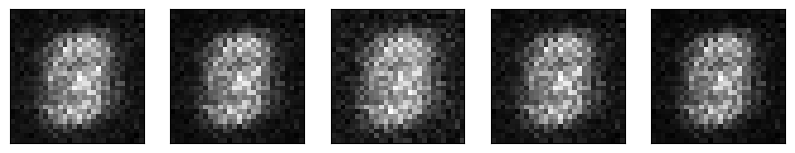

Época 002 finalizada: Loss Discriminador 1.111408 - Loss Gerador 2.472993


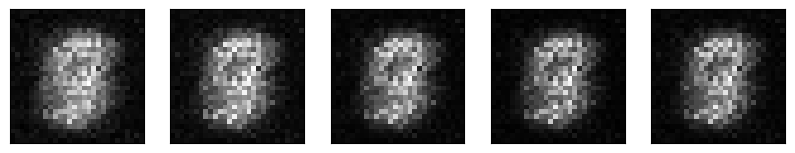

Época 003 finalizada: Loss Discriminador 1.256296 - Loss Gerador 1.466574


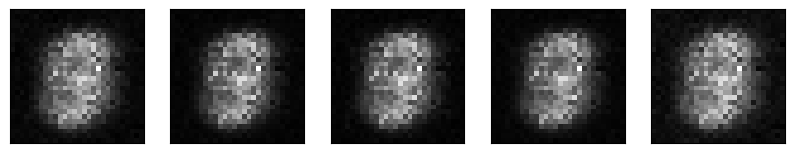

Época 004 finalizada: Loss Discriminador 1.232347 - Loss Gerador 1.479814


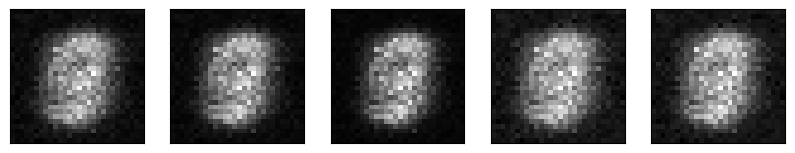

Época 005 finalizada: Loss Discriminador 1.280633 - Loss Gerador 1.262441


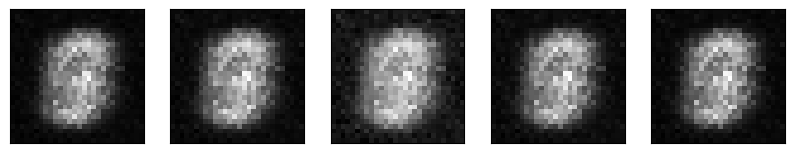

Época 006 finalizada: Loss Discriminador 1.251519 - Loss Gerador 1.411478


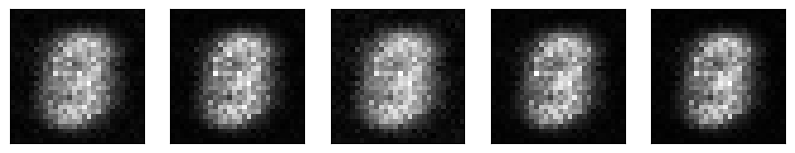

Época 007 finalizada: Loss Discriminador 1.243521 - Loss Gerador 1.451602


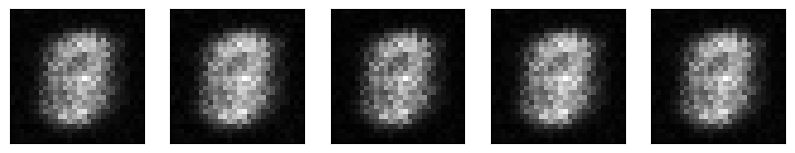

Época 008 finalizada: Loss Discriminador 1.267072 - Loss Gerador 1.098442


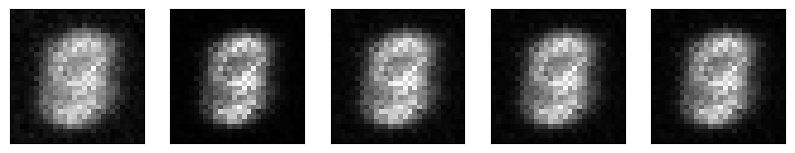

Época 009 finalizada: Loss Discriminador 1.235530 - Loss Gerador 1.381714


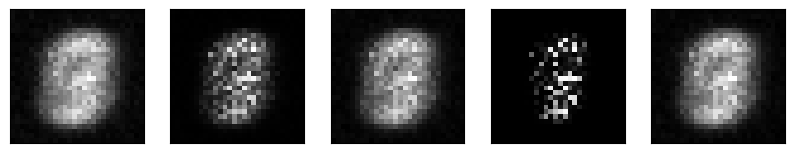

Época 010 finalizada: Loss Discriminador 1.137236 - Loss Gerador 1.452128


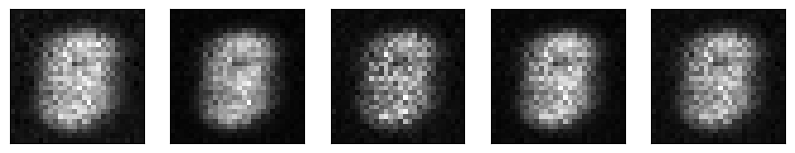

Época 011 finalizada: Loss Discriminador 1.047553 - Loss Gerador 1.502157


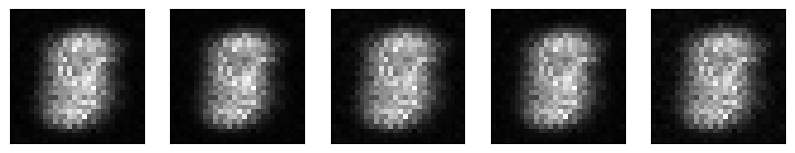

Época 012 finalizada: Loss Discriminador 1.002194 - Loss Gerador 1.806305


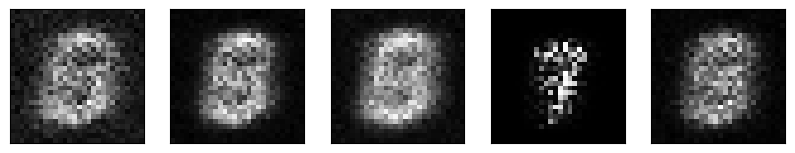

Época 013 finalizada: Loss Discriminador 1.039908 - Loss Gerador 1.769121


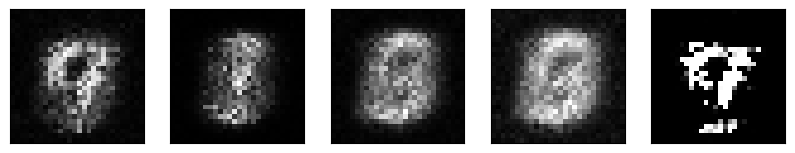

Época 014 finalizada: Loss Discriminador 1.054798 - Loss Gerador 1.768158


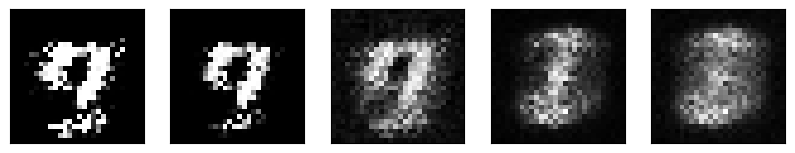

Época 015 finalizada: Loss Discriminador 0.972200 - Loss Gerador 1.934423


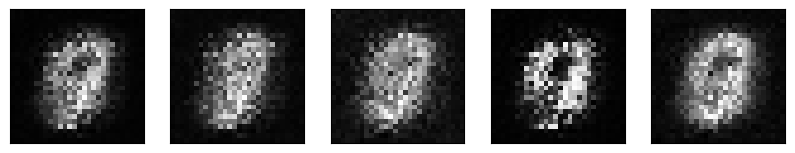

Época 016 finalizada: Loss Discriminador 1.044969 - Loss Gerador 1.937571


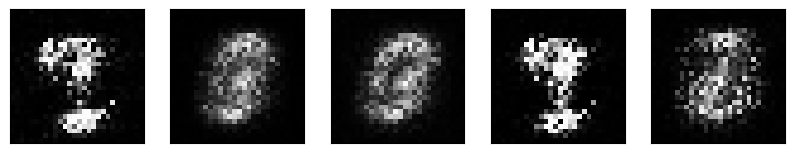

Época 017 finalizada: Loss Discriminador 1.135125 - Loss Gerador 1.951344


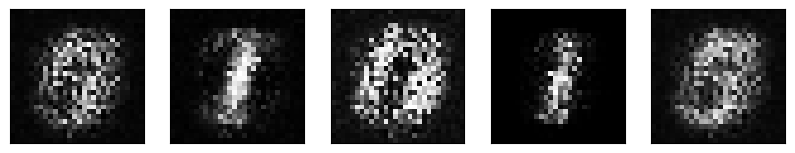

Época 018 finalizada: Loss Discriminador 1.082376 - Loss Gerador 2.509060


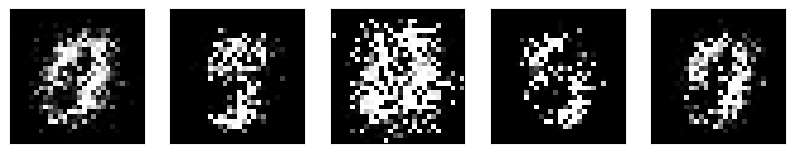

Época 019 finalizada: Loss Discriminador 1.000549 - Loss Gerador 2.841251


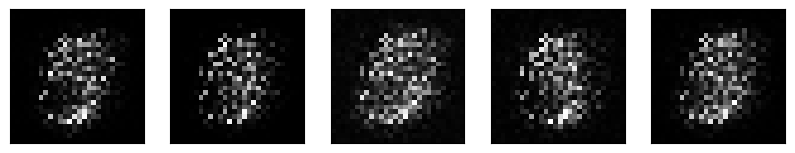

Época 020 finalizada: Loss Discriminador 0.974978 - Loss Gerador 3.025412


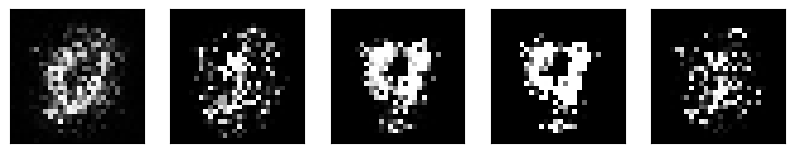

Época 021 finalizada: Loss Discriminador 1.001165 - Loss Gerador 3.310606


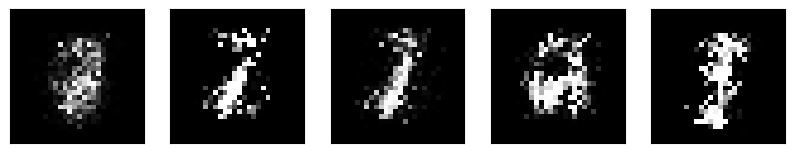

Época 022 finalizada: Loss Discriminador 1.032801 - Loss Gerador 2.769398


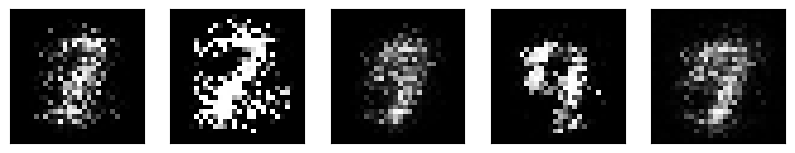

Época 023 finalizada: Loss Discriminador 0.971780 - Loss Gerador 3.345188


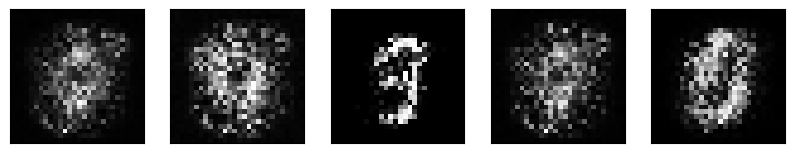

Época 024 finalizada: Loss Discriminador 0.996282 - Loss Gerador 2.888874


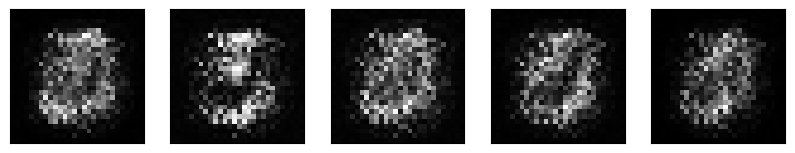

Época 025 finalizada: Loss Discriminador 1.036183 - Loss Gerador 2.667982


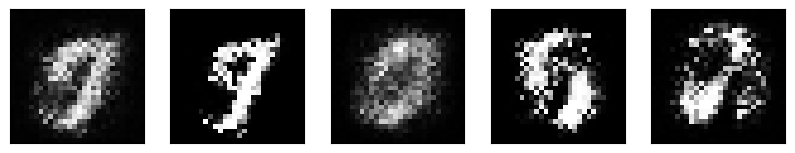

Época 026 finalizada: Loss Discriminador 1.007391 - Loss Gerador 2.540383


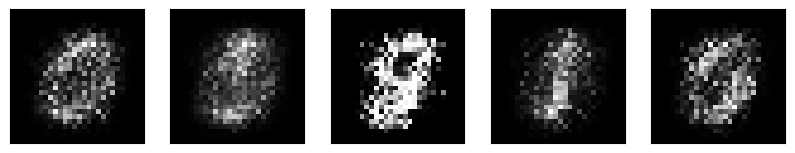

Época 027 finalizada: Loss Discriminador 0.988665 - Loss Gerador 2.440219


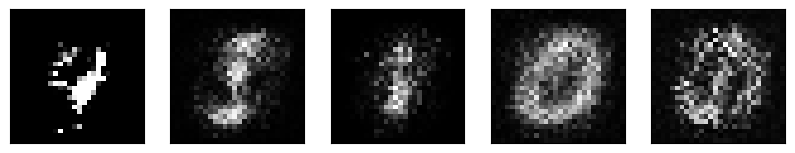

Época 028 finalizada: Loss Discriminador 1.047224 - Loss Gerador 1.946505


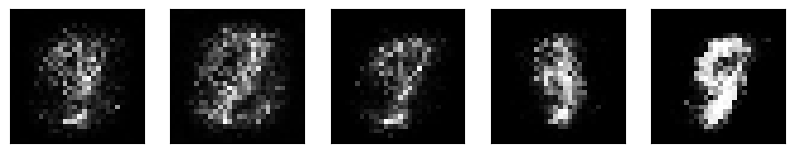

Época 029 finalizada: Loss Discriminador 1.014422 - Loss Gerador 1.938188


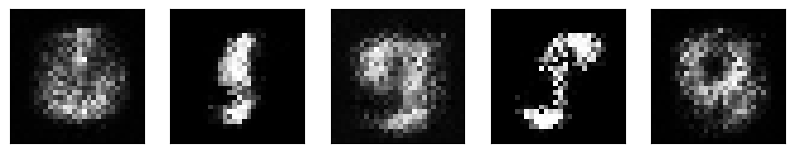

Época 030 finalizada: Loss Discriminador 1.024437 - Loss Gerador 1.860586


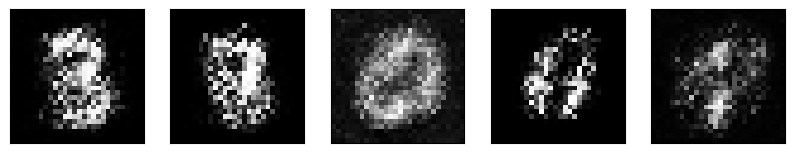

Época 031 finalizada: Loss Discriminador 1.022148 - Loss Gerador 1.804607


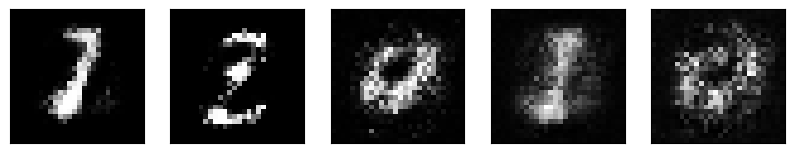

Época 032 finalizada: Loss Discriminador 1.073551 - Loss Gerador 1.619607


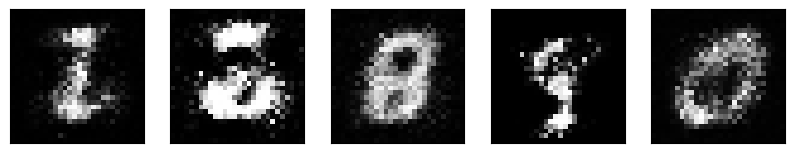

Época 033 finalizada: Loss Discriminador 1.117297 - Loss Gerador 1.513677


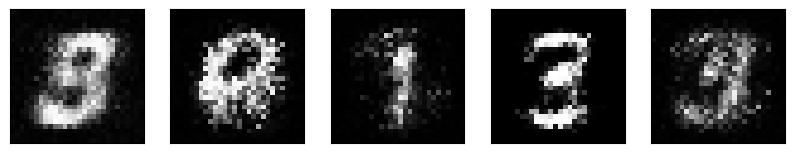

Época 034 finalizada: Loss Discriminador 1.108925 - Loss Gerador 1.489726


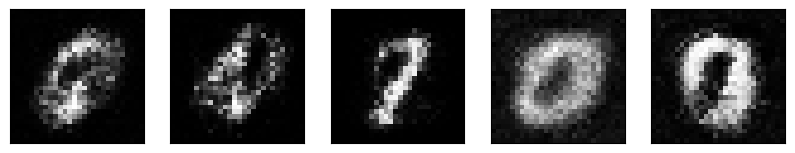

Época 035 finalizada: Loss Discriminador 1.116642 - Loss Gerador 1.466863


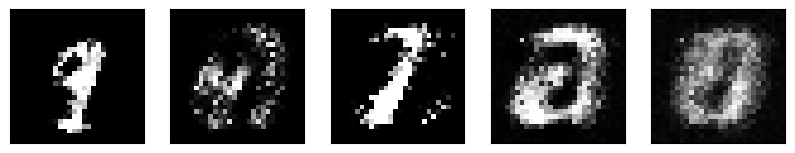

Época 036 finalizada: Loss Discriminador 1.151557 - Loss Gerador 1.400128


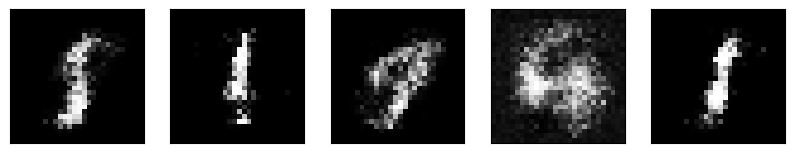

Época 037 finalizada: Loss Discriminador 1.177378 - Loss Gerador 1.311995


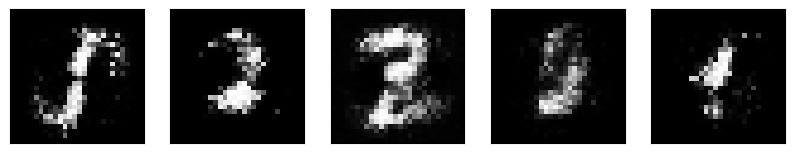

Época 038 finalizada: Loss Discriminador 1.184790 - Loss Gerador 1.257609


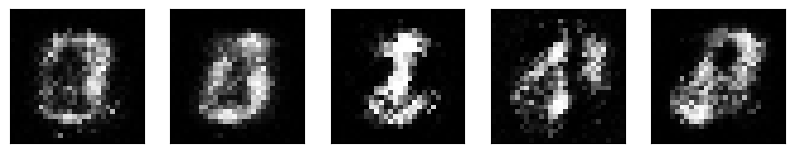

Época 039 finalizada: Loss Discriminador 1.220418 - Loss Gerador 1.195525


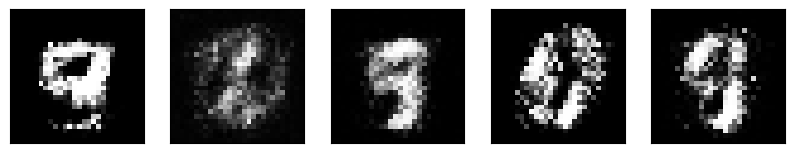

Época 040 finalizada: Loss Discriminador 1.250949 - Loss Gerador 1.124658


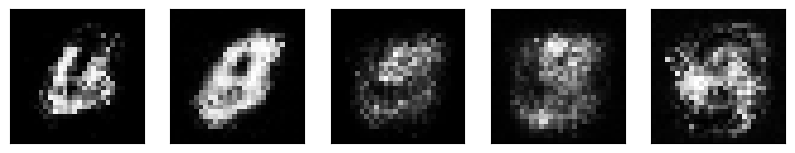

Época 041 finalizada: Loss Discriminador 1.256998 - Loss Gerador 1.087849


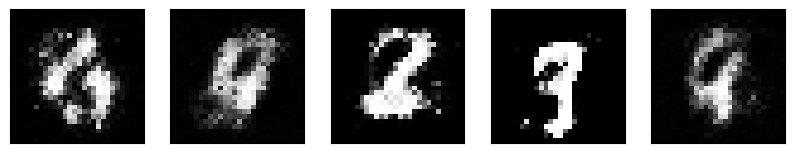

Época 042 finalizada: Loss Discriminador 1.238569 - Loss Gerador 1.112870


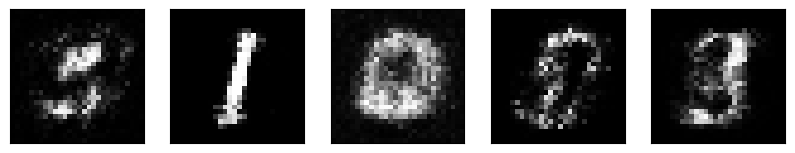

Época 043 finalizada: Loss Discriminador 1.256309 - Loss Gerador 1.085753


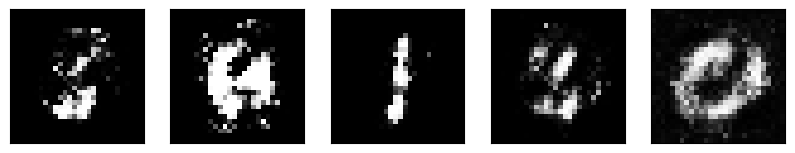

Época 044 finalizada: Loss Discriminador 1.237890 - Loss Gerador 1.105683


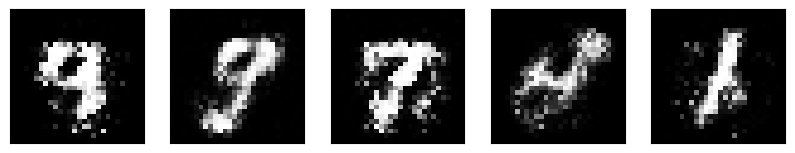

Época 045 finalizada: Loss Discriminador 1.253948 - Loss Gerador 1.045787


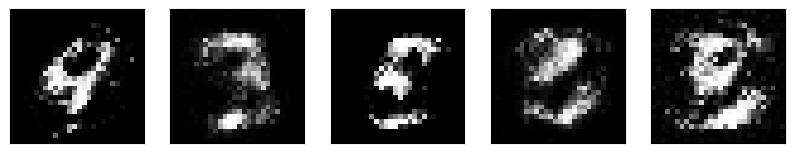

Época 046 finalizada: Loss Discriminador 1.278395 - Loss Gerador 1.038484


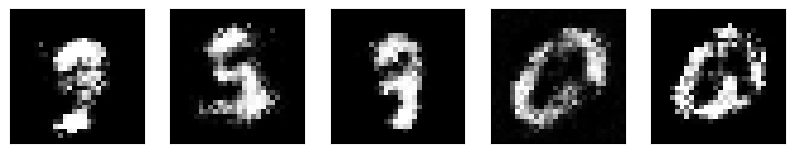

Época 047 finalizada: Loss Discriminador 1.278962 - Loss Gerador 1.035240


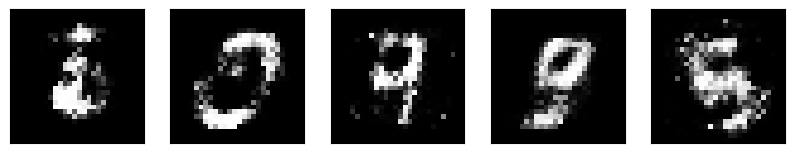

Época 048 finalizada: Loss Discriminador 1.274533 - Loss Gerador 1.041327


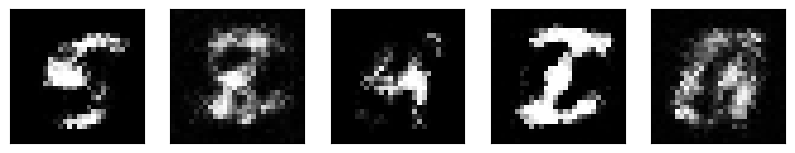

Época 049 finalizada: Loss Discriminador 1.243099 - Loss Gerador 1.085034


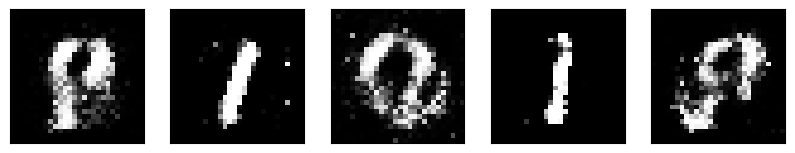

Época 050 finalizada: Loss Discriminador 1.248532 - Loss Gerador 1.107026


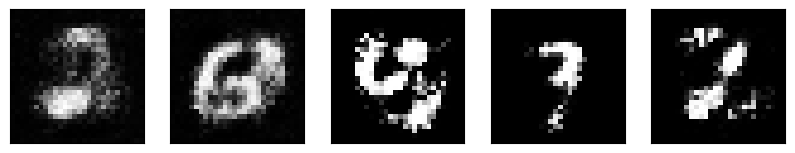

Época 051 finalizada: Loss Discriminador 1.268375 - Loss Gerador 1.084594


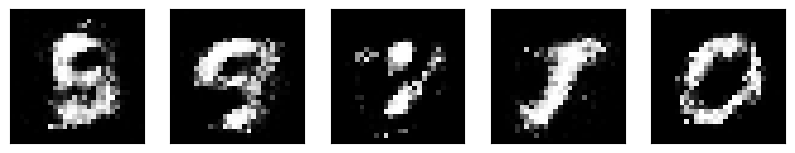

Época 052 finalizada: Loss Discriminador 1.265803 - Loss Gerador 1.040444


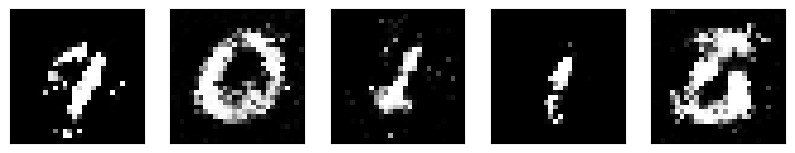

Época 053 finalizada: Loss Discriminador 1.251241 - Loss Gerador 1.071675


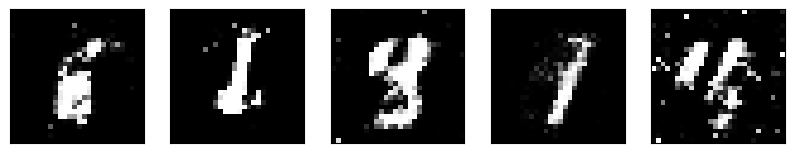

Época 054 finalizada: Loss Discriminador 1.276936 - Loss Gerador 1.048799


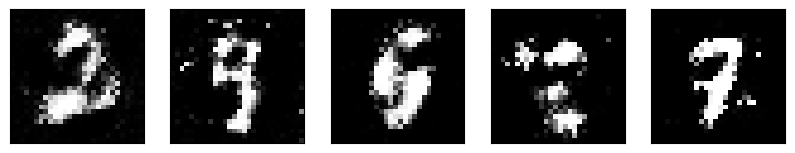

Época 055 finalizada: Loss Discriminador 1.259138 - Loss Gerador 1.042919


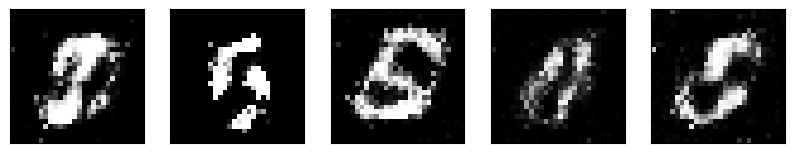

Época 056 finalizada: Loss Discriminador 1.250439 - Loss Gerador 1.119228


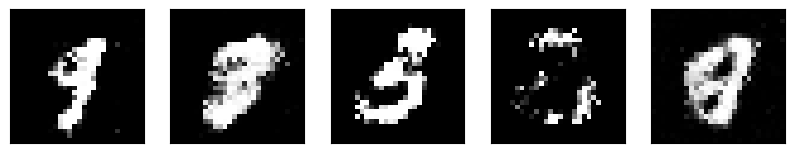

Época 057 finalizada: Loss Discriminador 1.250003 - Loss Gerador 1.092515


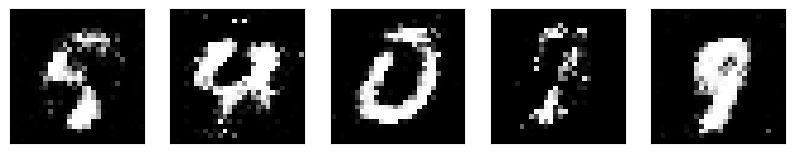

Época 058 finalizada: Loss Discriminador 1.237951 - Loss Gerador 1.154681


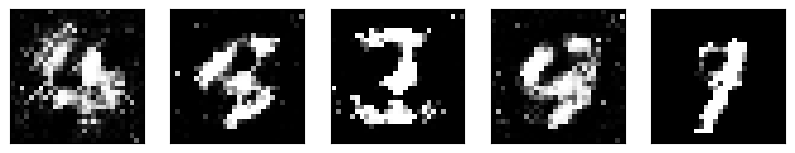

Época 059 finalizada: Loss Discriminador 1.257208 - Loss Gerador 1.111839


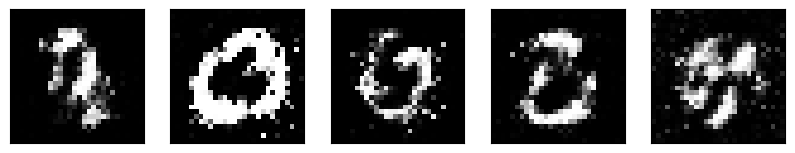

Época 060 finalizada: Loss Discriminador 1.218049 - Loss Gerador 1.187297


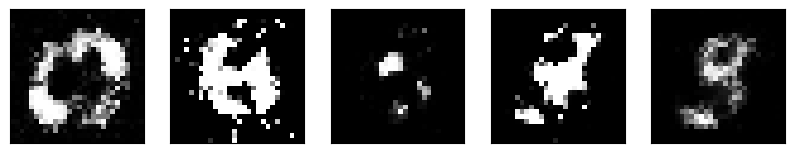

Época 061 finalizada: Loss Discriminador 1.228129 - Loss Gerador 1.203596


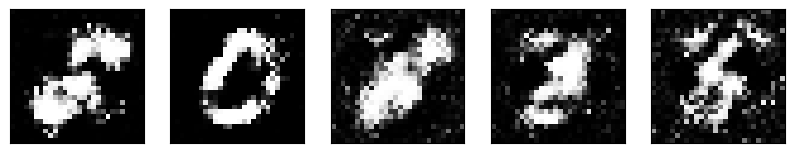

Época 062 finalizada: Loss Discriminador 1.229028 - Loss Gerador 1.147675


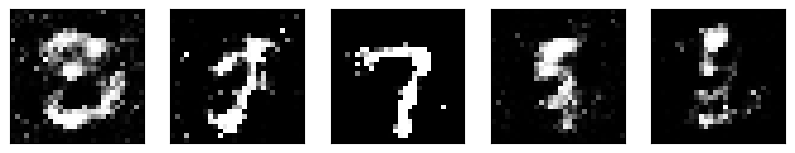

Época 063 finalizada: Loss Discriminador 1.256214 - Loss Gerador 1.092469


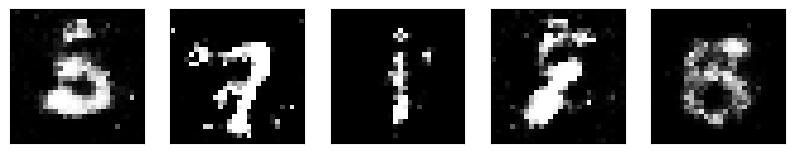

Época 064 finalizada: Loss Discriminador 1.239589 - Loss Gerador 1.170832


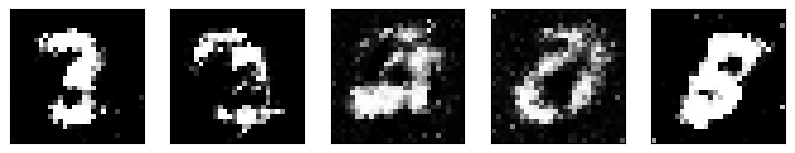

Época 065 finalizada: Loss Discriminador 1.214390 - Loss Gerador 1.201302


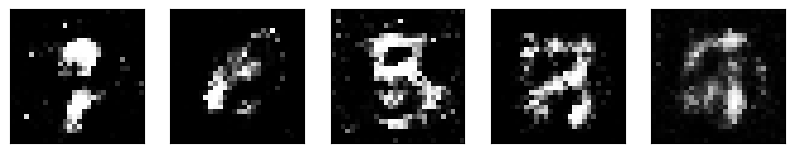

Época 066 finalizada: Loss Discriminador 1.214999 - Loss Gerador 1.224979


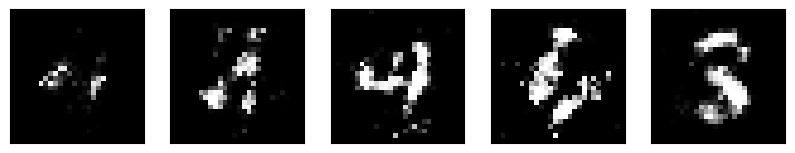

Época 067 finalizada: Loss Discriminador 1.229509 - Loss Gerador 1.173701


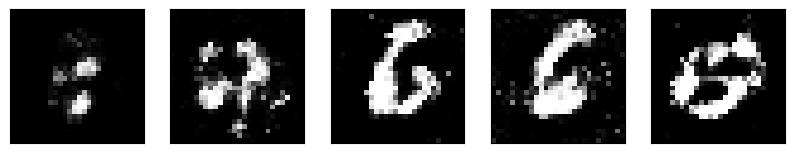

Época 068 finalizada: Loss Discriminador 1.216648 - Loss Gerador 1.182678


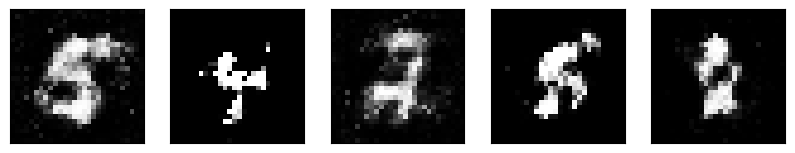

Época 069 finalizada: Loss Discriminador 1.211384 - Loss Gerador 1.187855


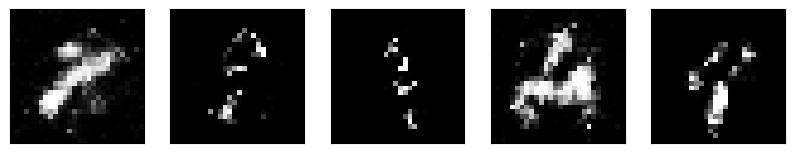

Época 070 finalizada: Loss Discriminador 1.236731 - Loss Gerador 1.132102


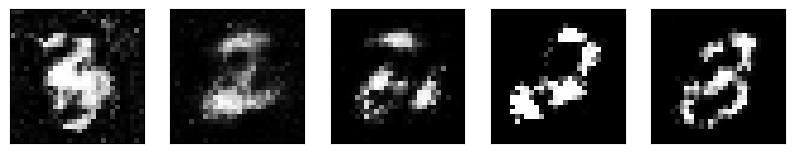

Época 071 finalizada: Loss Discriminador 1.247406 - Loss Gerador 1.120057


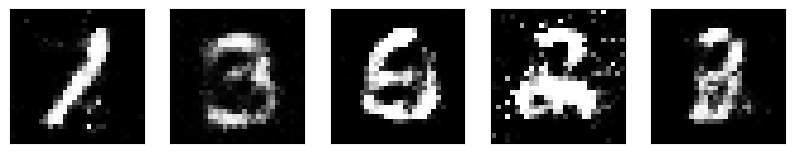

Época 072 finalizada: Loss Discriminador 1.247069 - Loss Gerador 1.115232


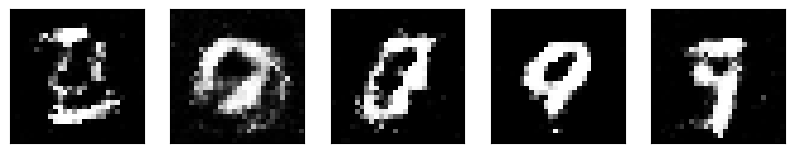

Época 073 finalizada: Loss Discriminador 1.241341 - Loss Gerador 1.135286


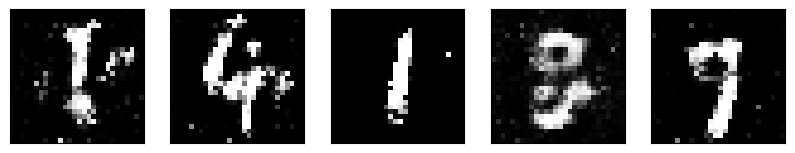

Época 074 finalizada: Loss Discriminador 1.247950 - Loss Gerador 1.099636


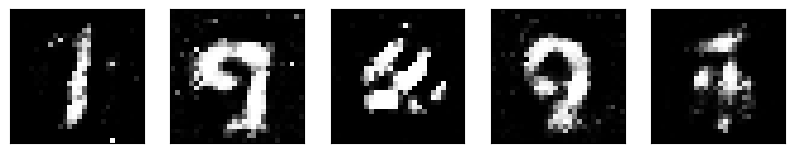

Época 075 finalizada: Loss Discriminador 1.243132 - Loss Gerador 1.119954


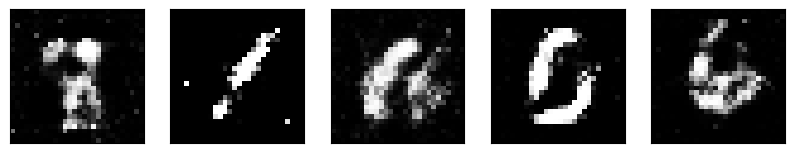

Época 076 finalizada: Loss Discriminador 1.248028 - Loss Gerador 1.099066


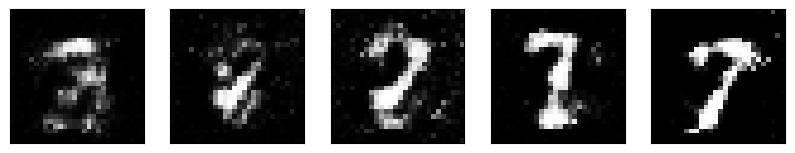

Época 077 finalizada: Loss Discriminador 1.252329 - Loss Gerador 1.109907


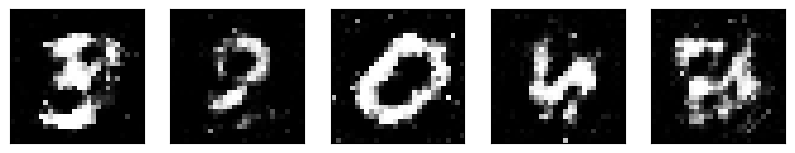

Época 078 finalizada: Loss Discriminador 1.251122 - Loss Gerador 1.094491


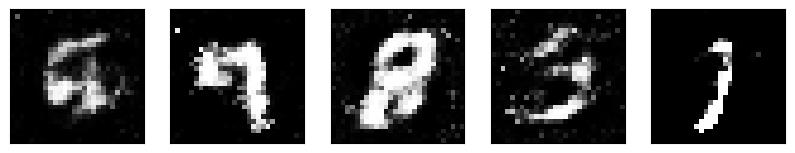

Época 079 finalizada: Loss Discriminador 1.253587 - Loss Gerador 1.095188


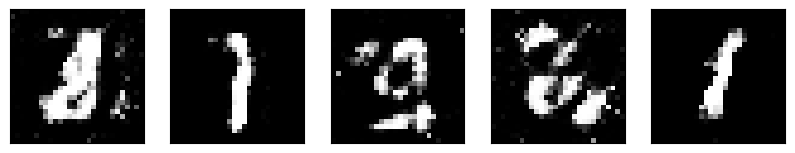

Época 080 finalizada: Loss Discriminador 1.253996 - Loss Gerador 1.101871


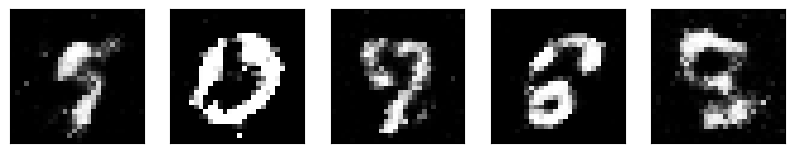

Época 081 finalizada: Loss Discriminador 1.239298 - Loss Gerador 1.112761


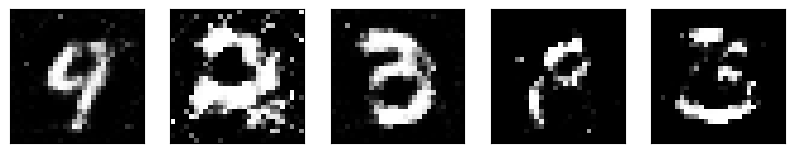

Época 082 finalizada: Loss Discriminador 1.247141 - Loss Gerador 1.104833


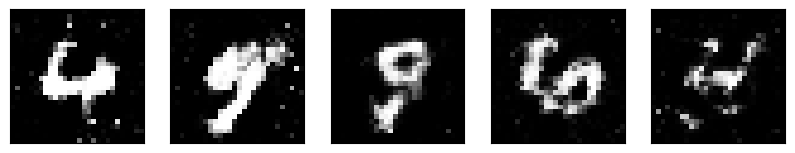

Época 083 finalizada: Loss Discriminador 1.254595 - Loss Gerador 1.092620


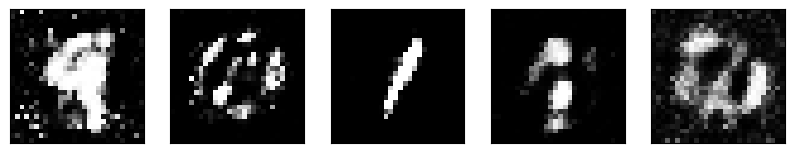

Época 084 finalizada: Loss Discriminador 1.251834 - Loss Gerador 1.093777


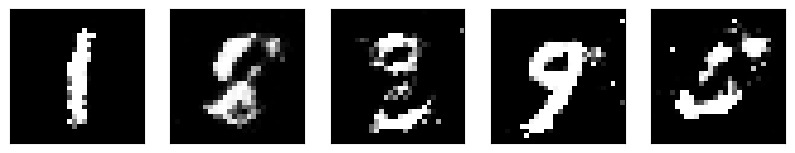

Época 085 finalizada: Loss Discriminador 1.254594 - Loss Gerador 1.097382


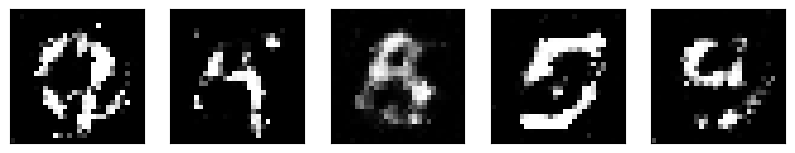

Época 086 finalizada: Loss Discriminador 1.240258 - Loss Gerador 1.109798


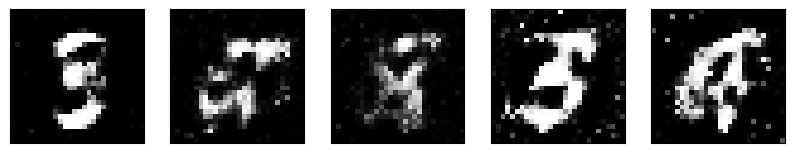

Época 087 finalizada: Loss Discriminador 1.230365 - Loss Gerador 1.132725


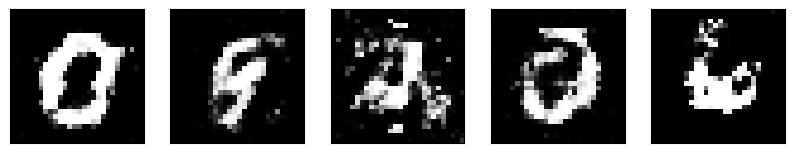

Época 088 finalizada: Loss Discriminador 1.254146 - Loss Gerador 1.094992


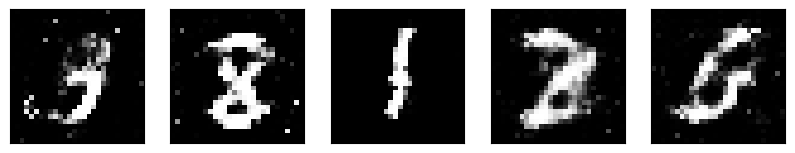

Época 089 finalizada: Loss Discriminador 1.243429 - Loss Gerador 1.123691


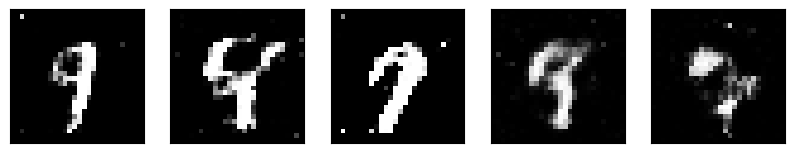

Época 090 finalizada: Loss Discriminador 1.260702 - Loss Gerador 1.080063


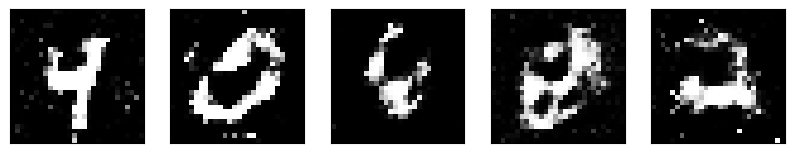

Época 091 finalizada: Loss Discriminador 1.268018 - Loss Gerador 1.085388


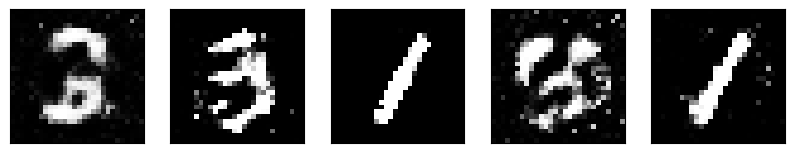

Época 092 finalizada: Loss Discriminador 1.264558 - Loss Gerador 1.093453


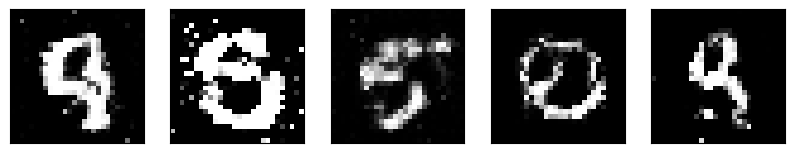

Época 093 finalizada: Loss Discriminador 1.248836 - Loss Gerador 1.104443


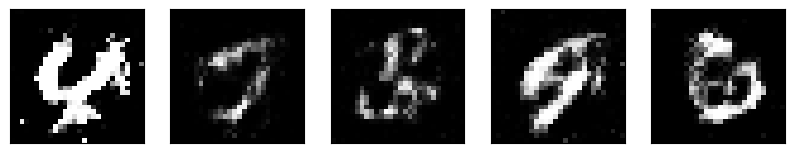

Época 094 finalizada: Loss Discriminador 1.249570 - Loss Gerador 1.105387


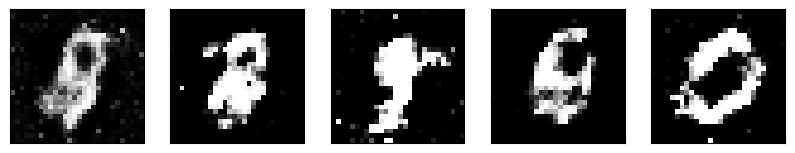

Época 095 finalizada: Loss Discriminador 1.250343 - Loss Gerador 1.154730


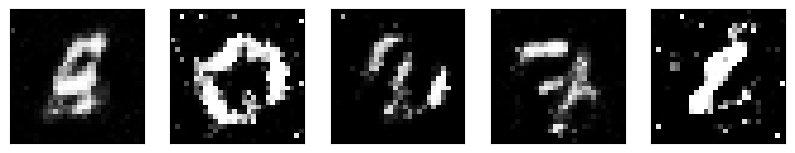

Época 096 finalizada: Loss Discriminador 1.236590 - Loss Gerador 1.152345


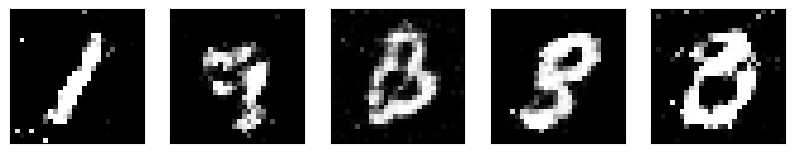

Época 097 finalizada: Loss Discriminador 1.246756 - Loss Gerador 1.135221


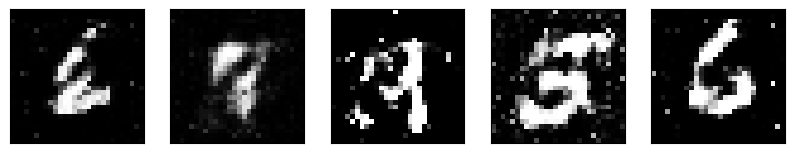

Época 098 finalizada: Loss Discriminador 1.234498 - Loss Gerador 1.172828


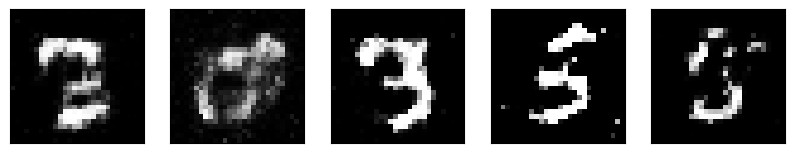

Época 099 finalizada: Loss Discriminador 1.231594 - Loss Gerador 1.139698


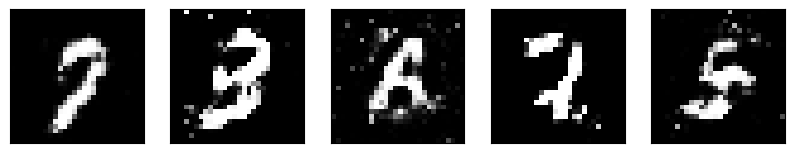

Época 100 finalizada: Loss Discriminador 1.244035 - Loss Gerador 1.141824


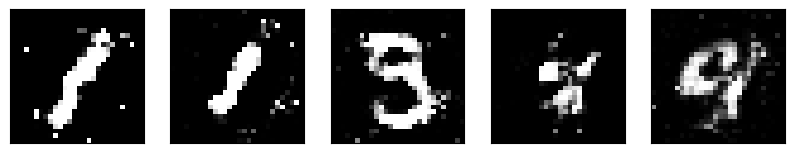

In [ ]:
for epoch in range(100):
  D_running_loss = 0.
  G_running_loss = 0.

  for i, (imagens_reais, _) in enumerate(train_loader):
    batch_size = imagens_reais.size(0)

    imagens_reais = imagens_reais*2 - 1 # para lidar com a negatividade da tanh
    imagens_reais = imagens_reais.to(device)

    # Treinamento do gerador
    G_optimizer.zero_grad()

    ruido = np.random.uniform(low=-1., high=1., size=(batch_size, 100))
    ruido = torch.from_numpy(ruido).float().to(device)

    imagens_falsas = G(ruido)
    outputs_falsas = D(imagens_falsas)
    labels_falsas = torch.ones(batch_size).to(device)

    G_loss = criterion(outputs_falsas.view(*labels_falsas.shape), labels_falsas)
    G_loss.backward()
    G_optimizer.step()

    G_running_loss += G_loss.item()

    # Treinamento do discriminador
    D_optimizer.zero_grad()

    outputs_reais = D(imagens_reais)
    labels_reais = (torch.ones(batch_size)).to(device) * 0.9 # suavização
    D_loss_reais = criterion(outputs_reais.view(*labels_reais.shape), labels_reais)

    ruido = np.random.uniform(low=-1., high=1., size=(batch_size, 100))
    ruido = torch.from_numpy(ruido).float().to(device)
    imagens_falsas = G(ruido)
    outputs_falsas = D(imagens_falsas)
    labels_falsas = torch.zeros(batch_size).to(device)
    D_loss_falsas = criterion(outputs_falsas.view(*labels_falsas.shape), labels_falsas)

    D_loss = D_loss_reais + D_loss_falsas
    D_loss.backward()
    D_optimizer.step()

    D_running_loss += D_loss.item()

  D_running_loss /= len(train_loader)
  G_running_loss /= len(train_loader)

  print(f'Época {epoch+1:03d} finalizada: Loss Discriminador {D_running_loss:03.6f} - Loss Gerador {G_running_loss:03.6f}')

  fig,ax = plt.subplots(1, 5, figsize=(10, 5))
  for i in range(5):
    ax[i].imshow(imagens_falsas.cpu().detach().numpy()[i].reshape(28, 28), cmap='gray')
    ax[i].xaxis.set_visible(False)
    ax[i].yaxis.set_visible(False)
  plt.show()

# Etapa 7: Criação de novas imagens

In [ ]:
ruido = np.random.uniform(-1.,1.,(20, 100)) # 20 imagens (rede gera com 100 ruidos)
ruido = torch.from_numpy(ruido).float().to(device)

G.eval()
imagens_geradas = G(ruido)

fig,ax = plt.subplots(4, 5, figsize=(10, 8))
for i in range(imagens_geradas.shape[0]):
  ax[i//5, i%5].imshow(imagens_geradas.cpu().detach().numpy()[i].reshape(28, 28), cmap='gray')
